In [16]:
import math
import numpy as np
from scipy.optimize import fsolve
import sys

Level 1: No End Sem

1.a

In [17]:
class answer1a():
    def __init__(self) -> None:
        self.l = 0.25
        self.m = 0.8
        self.I = 0.005
        self.pts = []
        self.check = True
        pass

    def makePts(self,A,B,C,D):
        self.pts = [A,B,C,D]
        for i in range(len(self.pts)):
            if self.pts[i][0]>0.45 or self.pts[i][0]<0.25 or self.pts[i][1]<-0.075 or self.pts[i][1]>0.075 or self.pts[i][2]!=0.1:
                print("Enter values within the box")
                sys.exit()
        pass

    def Stanford_type(self,):
        l1 = self.l
        l2 = self.l
        t1=[]
        t2=[]
        for i in range(len(self.pts)):
            # Inverse kinematics
            x_e = self.pts[i][0]
            y_e = self.pts[i][1]
            z_e = self.pts[i][2]
            d = math.sqrt((x_e**2 + y_e**2 +(z_e-l1)**2)) - l2
            theta1 = math.atan((y_e/x_e))
            r = math.sqrt((x_e**2 + y_e**2))
            s = z_e - l1
            theta2 = math.atan((s/r))
            # Verification
            x = (d + l2)*math.cos(theta1)*math.cos(theta2)
            y = (d + l2)*math.sin(theta1)*math.cos(theta2)
            z = (d + l2)*math.sin(theta2) + l1
            t1.append(theta1)
            t2.append(theta2)
            if self.check:
                print("\n Corner: "+str(i+1)+"\n d: "+str(d)+", theta_1: "+str(theta1)+", theta_2: "+str(theta2)+
                    "\n x: "+str(x)+", y: "+str(y)+", z: "+str(z)+"\n Required x: "+str(x_e)+", y: "+str(y_e)+", z: "+str(z_e))
        if self.check:
            pass
        else:
            return t1,t2


    def PUMA_type(self,):
        l1 = self.l
        l2 = self.l
        l3 = self.l
        t1 = []
        t2 = []
        t3 = []
        for i in range(len(self.pts)):
            # Inverse kinematics
            x_e = self.pts[i][0]
            y_e = self.pts[i][1]
            z_e = self.pts[i][2]
            theta1 = math.atan2(y_e,x_e)
            D = (x_e**2 + y_e**2 + (z_e-l1)**2 - l2**2 - l3**2)/(2*l2*l3)
            theta3 = math.atan2(math.sqrt(1 - D**2),D)
            theta2 = math.atan2((z_e - l1),(math.sqrt(x_e**2 + y_e**2))) - math.atan2((l3*math.sin(theta3)),(l2 + l3*math.cos(theta3)))
            # Verification
            x = (l3*math.cos(theta3+theta2) + l2*math.cos(theta2))*math.cos(theta1)
            y = (l3*math.cos(theta3+theta2) + l2*math.cos(theta2))*math.sin(theta1)
            z = l3*math.sin(theta3+theta2) + l2*math.sin(theta2) + l1
            t1.append(theta1)
            t2.append(theta2)
            t3.append(theta3)
            if self.check:
                print("\n Corner: "+str(i+1)+"\n theta_1: "+str(theta1)+", theta_2: "+str(theta2)+", theta_3: "+str(theta3)+
                    "\n x: "+str(x)+", y: "+str(y)+", z: "+str(z)+"\n Required x: "+str(x_e)+", y: "+str(y_e)+", z: "+str(z_e))
        if self.check:
            pass
        else:
            return t1, t2, t3

    def SCARA_type(self,):
        l0 = self.l
        l1 = self.l
        l2 = self.l
        t1 = []
        t2 = []
        for i in range(len(self.pts)):
            # Inverse kinematics
            x_e = self.pts[i][0]
            y_e = self.pts[i][1]
            z_e = self.pts[i][2]
            def inverseKinematics(args):
                return [-x_e + l2*math.cos(args[0]+args[1]) + l1*math.cos(args[0]),
                        -y_e + l2*math.sin(args[0]+args[1]) + l1*math.sin(args[0]), 
                        -z_e + l0 - args[2]]
            [theta1,theta2,d] = fsolve(inverseKinematics,[0,0,0])
            # Verification
            x = l2*math.cos(theta1+theta2) + l1*math.cos(theta1)
            y = l2*math.sin(theta1+theta2) + l1*math.sin(theta1)
            z = l0 - d
            t1.append(theta1)
            t2.append(theta2)
            if self.check:
                print("\n Corner: "+str(i+1)+"\n d: "+str(d)+", theta_1: "+str(theta1)+", theta_2: "+str(theta2)+
                    "\n x: "+str(x)+", y: "+str(y)+", z: "+str(z)+"\n Required x: "+str(x_e)+", y: "+str(y_e)+", z: "+str(z_e))
        if self.check:
            pass
        else:
            return t1,t2

In [197]:
A = [0.45, 0.075, 0.1]
B = [0.45, -0.075, 0.1]
C = [0.25, -0.075, 0.1]
D = [0.25, 0.075, 0.1]
a1 = answer1a()
a1.makePts(A,B,C,D)
print("For Stanford type:")
a1.Stanford_type()

For Stanford type:

 Corner: 1
 d: 0.23023431780746367, theta_1: 0.16514867741462683, theta_2: -0.3176631929822606
 x: 0.45, y: 0.07499999999999998, z: 0.09999999999999998
 Required x: 0.45, y: 0.075, z: 0.1

 Corner: 2
 d: 0.23023431780746367, theta_1: -0.16514867741462683, theta_2: -0.3176631929822606
 x: 0.45, y: -0.07499999999999998, z: 0.09999999999999998
 Required x: 0.45, y: -0.075, z: 0.1

 Corner: 3
 d: 0.051039864469807406, theta_1: -0.2914567944778671, theta_2: -0.5216056136891403
 x: 0.25000000000000006, y: -0.07500000000000001, z: 0.1
 Required x: 0.25, y: -0.075, z: 0.1

 Corner: 4
 d: 0.051039864469807406, theta_1: 0.2914567944778671, theta_2: -0.5216056136891403
 x: 0.25000000000000006, y: 0.07500000000000001, z: 0.1
 Required x: 0.25, y: 0.075, z: 0.1


In [198]:
print("For PUMA type:")
a1.PUMA_type()

For PUMA type:

 Corner: 1
 theta_1: 0.16514867741462683, theta_2: -0.5997787728460515, theta_3: 0.564231159727582
 x: 0.45000000000000007, y: 0.075, z: 0.1
 Required x: 0.45, y: 0.075, z: 0.1

 Corner: 2
 theta_1: -0.16514867741462683, theta_2: -0.5997787728460515, theta_3: 0.564231159727582
 x: 0.45000000000000007, y: -0.075, z: 0.1
 Required x: 0.45, y: -0.075, z: 0.1

 Corner: 3
 theta_1: -0.2914567944778671, theta_2: -1.4462986282824137, theta_3: 1.8493860291865472
 x: 0.25, y: -0.07500000000000001, z: 0.10000000000000003
 Required x: 0.25, y: -0.075, z: 0.1

 Corner: 4
 theta_1: 0.2914567944778671, theta_2: -1.4462986282824137, theta_3: 1.8493860291865472
 x: 0.25, y: 0.07500000000000001, z: 0.10000000000000003
 Required x: 0.25, y: 0.075, z: 0.1


In [199]:
print("For SCARA type:")
a1.SCARA_type()

For SCARA type:

 Corner: 1
 d: 0.15, theta_1: 6.869985238543735, theta_2: -13.409673122613764
 x: 0.45000000006772045, y: 0.07499999992906618, z: 0.1
 Required x: 0.45, y: 0.075, z: 0.1

 Corner: 2
 d: 0.15, theta_1: 0.25650257698014334, theta_2: -0.8433025087898509
 x: 0.4500000000003548, y: -0.07500000000013095, z: 0.1
 Required x: 0.45, y: -0.075, z: 0.1

 Corner: 3
 d: 0.15, theta_1: 23.81970016388106, theta_2: -48.222313916554164
 x: 0.25000000001455785, y: -0.07499999998206483, z: 0.1
 Required x: 0.25, y: -0.075, z: 0.1

 Corner: 4
 d: 0.15, theta_1: 51.57852352249553, theta_2: -102.57413345585483
 x: 0.24999999998144698, y: 0.07500000001902604, z: 0.1
 Required x: 0.25, y: 0.075, z: 0.1


1.b

In [189]:
A = [eval(j) for j in input("Enter the coordinates of pt. A: ").split()]
B = [eval(j) for j in input("Enter the coordinates of pt. B: ").split()]
C = [eval(j) for j in input("Enter the coordinates of pt. C: ").split()]
D = [eval(j) for j in input("Enter the coordinates of pt. D: ").split()]

print("A:")
print(A)
print("B:")
print(B)
print("C")
print(C)
print("D:")
print(D)

a1 = answer1a()
a1.makePts(A,B,C,D)


A:
[0.42, 0.06, 0.1]
B:
[0.42, -0.06, 0.1]
C
[0.32, -0.06, 0.1]
D:
[0.32, 0.06, 0.1]


In [190]:
print("For Stanford type:")
a1.Stanford_type()

For Stanford type:

 Corner: 1
 d: 0.19999999999999996, theta_1: 0.1418970546041639, theta_2: -0.339836909454122
 x: 0.42, y: 0.06, z: 0.1
 Required x: 0.42, y: 0.06, z: 0.1

 Corner: 2
 d: 0.19999999999999996, theta_1: -0.1418970546041639, theta_2: -0.339836909454122
 x: 0.42, y: -0.06, z: 0.1
 Required x: 0.42, y: -0.06, z: 0.1

 Corner: 3
 d: 0.10846896657869842, theta_1: -0.18534794999569476, theta_2: -0.4317339371903759
 x: 0.32, y: -0.06, z: 0.1
 Required x: 0.32, y: -0.06, z: 0.1

 Corner: 4
 d: 0.10846896657869842, theta_1: 0.18534794999569476, theta_2: -0.4317339371903759
 x: 0.32, y: 0.06, z: 0.1
 Required x: 0.32, y: 0.06, z: 0.1


In [191]:
print("For PUMA type:")
a1.PUMA_type()

For PUMA type:

 Corner: 1
 theta_1: 0.14189705460416394, theta_2: -0.7908637212503846, theta_3: 0.9020536235925253
 x: 0.42, y: 0.060000000000000005, z: 0.09999999999999998
 Required x: 0.42, y: 0.06, z: 0.1

 Corner: 2
 theta_1: -0.14189705460416394, theta_2: -0.7908637212503846, theta_3: 0.9020536235925253
 x: 0.42, y: -0.060000000000000005, z: 0.09999999999999998
 Required x: 0.42, y: -0.06, z: 0.1

 Corner: 3
 theta_1: -0.18534794999569476, theta_2: -1.2031302706088007, theta_3: 1.5427926668368497
 x: 0.31999999999999995, y: -0.06, z: 0.09999999999999998
 Required x: 0.32, y: -0.06, z: 0.1

 Corner: 4
 theta_1: 0.18534794999569476, theta_2: -1.2031302706088007, theta_3: 1.5427926668368497
 x: 0.31999999999999995, y: 0.06, z: 0.09999999999999998
 Required x: 0.32, y: 0.06, z: 0.1


In [192]:
print("For SCARA type:")
a1.SCARA_type()

For SCARA type:

 Corner: 1
 d: 0.15, theta_1: 0.6994958813036846, theta_2: -1.1151976533990582
 x: 0.4200000000000025, y: 0.059999999999996736, z: 0.1
 Required x: 0.42, y: 0.06, z: 0.1

 Corner: 2
 d: 0.15, theta_1: 18.150060040237424, theta_2: -36.58391418968121
 x: 0.4200000000004209, y: -0.05999999999963879, z: 0.1
 Required x: 0.42, y: -0.06, z: 0.1

 Corner: 3
 d: 0.15, theta_1: 25.80908717750156, theta_2: -51.9888702556333
 x: 0.3200000000214901, y: -0.06000000010982934, z: 0.1
 Required x: 0.32, y: -0.06, z: 0.1

 Corner: 4
 d: 0.15, theta_1: 32.46296838510793, theta_2: -64.55524087021384
 x: 0.3199999999990539, y: 0.06000000000158312, z: 0.1
 Required x: 0.32, y: 0.06, z: 0.1


1.c

In [200]:
A = [0.4, 0.06, 0.1]
B = [0.4, 0.01, 0.1]
C = [0.35, 0.01, 0.1]
D = [0.35, 0.06, 0.1]
a1 = answer1a()
a1.makePts(A,B,C,D)
print("For Stanford type:")
a1.Stanford_type()

For Stanford type:

 Corner: 1
 d: 0.18139309220245986, theta_1: 0.14888994760949725, theta_2: -0.3551283547555233
 x: 0.4, y: 0.06000000000000001, z: 0.1
 Required x: 0.4, y: 0.06, z: 0.1

 Corner: 2
 d: 0.17731721238442993, theta_1: 0.024994793618920156, theta_2: -0.3586679747243447
 x: 0.4, y: 0.009999999999999998, z: 0.10000000000000003
 Required x: 0.4, y: 0.01, z: 0.1

 Corner: 3
 d: 0.13091993909481814, theta_1: 0.028563657838759998, theta_2: -0.4047440841038663
 x: 0.3499999999999999, y: 0.01, z: 0.10000000000000003
 Required x: 0.35, y: 0.01, z: 0.1

 Corner: 4
 d: 0.13548670534792762, theta_1: 0.16977827396833844, theta_2: -0.3996744581806758
 x: 0.35, y: 0.06, z: 0.1
 Required x: 0.35, y: 0.06, z: 0.1


In [201]:
print("For PUMA type")
a1.PUMA_type()

For PUMA type

 Corner: 1
 theta_1: 0.14888994760949723, theta_2: -0.8851696682987095, theta_3: 1.0600826270863724
 x: 0.39999999999999997, y: 0.05999999999999999, z: 0.10000000000000003
 Required x: 0.4, y: 0.06, z: 0.1

 Corner: 2
 theta_1: 0.02499479361892016, theta_2: -0.9046179420290408, theta_3: 1.0918999346093923
 x: 0.4000000000000001, y: 0.010000000000000002, z: 0.10000000000000003
 Required x: 0.4, y: 0.01, z: 0.1

 Corner: 3
 theta_1: 0.028563657838759998, theta_2: -1.1093916739127891, theta_3: 1.4092951796178457
 x: 0.35, y: 0.01, z: 0.10000000000000003
 Required x: 0.35, y: 0.01, z: 0.1

 Corner: 4
 theta_1: 0.16977827396833844, theta_2: -1.0901026085347887, theta_3: 1.3808563007082255
 x: 0.35, y: 0.05999999999999999, z: 0.09999999999999998
 Required x: 0.35, y: 0.06, z: 0.1


In [202]:
print("For SCARA type")
a1.SCARA_type()

For SCARA type

 Corner: 1
 d: 0.15, theta_1: 0.7773225547941858, theta_2: -1.2568652143693786
 x: 0.40000000000000024, y: 0.05999999999999972, z: 0.1
 Required x: 0.4, y: 0.06, z: 0.1

 Corner: 2
 d: 0.15, theta_1: 0.6680791850484026, theta_2: -1.2861687828589634
 x: 0.3999999999999997, y: 0.010000000000000286, z: 0.1
 Required x: 0.4, y: 0.01, z: 0.1

 Corner: 3
 d: 0.15, theta_1: 0.8235624111580776, theta_2: -1.5899975066386323
 x: 0.3499999999999994, y: 0.01000000000000048, z: 0.1
 Required x: 0.35, y: 0.01, z: 0.1

 Corner: 4
 d: 0.15, theta_1: 0.9507763805742564, theta_2: -1.5619962132121068
 x: 0.3500000000000367, y: 0.059999999999957504, z: 0.1
 Required x: 0.35, y: 0.06, z: 0.1


Level 2 - No Quiz 2:

1.e

In [18]:
# This code was written for Assignment 4
class EulerAngles:

    def __init__(self) -> None:
        self.U = []
        self.theta = 0
        self.phi = 0
        self.psi = 0
        pass

    def takeInputs(self):
        U = np.zeros((3,3))
        for i in range(3):
            U[i,:] = [eval(j) for j in input("Enter row" + str(i+1) + " of U as c1 c2 c3: ").split()]
        self.U = U
        self.inverseKinematics()
        pass

    def inverseKinematics(self):
        theta = 0
        phi = 0
        psi = 0

        if self.U[0][2]!=0 or self.U[1][2]!=0 :
            m = int(input("Enter 1 for sin(theta) > 0 or 0 for sin(theta) <0 :"))
            if m == 1:
                theta = math.atan((math.sqrt(1 - self.U[2][2]*self.U[2][2]))/(self.U[2][2]))
                phi = math.atan((self.U[1][2])/(self.U[0][2]))
                psi = math.atan((self.U[2][1])/(-self.U[2][0]))
            elif m == 0:
                theta = math.atan((-math.sqrt(1 - self.U[2][2]*self.U[2][2]))/(self.U[2][2]))
                phi = math.atan((-self.U[1][2])/(-self.U[0][2]))
                psi = math.atan((-self.U[2][1])/(self.U[2][0]))
            else:
                print("Enter only 0s and 1s for the value of sin(theta)")

        else:
            if self.U[2][2] == 1:
                theta = 0
                temp = math.atan((self.U[1][0])/(self.U[0][0]))
                # By convention the value of phi is given as below
                phi = 0
                psi = temp - phi
            elif self.U[2][2] == -1:
                theta = math.pi
                temp = math.atan((-self.U[0][1])/(-self.U[0][0]))
                # By convention the value of phi is given as below
                phi = 0
                psi = phi - temp
            else:
                print("Enter valid input matrix")
    
        self.theta = theta
        self.phi = phi
        self.psi = psi
        pass

    def callback(self):
        self.takeInputs()
        return [self.theta, self.phi, self.psi]

In [19]:
class answer1e(answer1a,EulerAngles):
    
    def __init__(self) -> None:
        super().__init__()
        self.R = [[1,0,0],
                  [0,-1,0],
                  [0,0,-1]]
        self.check = False
        self.d6 = 0.05
        pass

    def calcEulerAngles(self,R03T):
        R03T = np.array(R03T)
        U = R03T@self.R
        self.U = U
        self.inverseKinematics()
        psi = self.psi
        theta = self.theta
        phi = self.phi
        print(str(theta)+", "+str(phi)+", "+str(psi))
        pass

    def Stanford_withWrist(self):
        for i in range(len(self.pts)):
            self.pts[i][2] = self.pts[i][2] + self.d6
        t1, t2 = self.Stanford_type()
        print("The Euler angles in the form theta,phi,psi: ")
        for i in range(len(t1)):
            theta1 = t1[i]
            theta2 = t2[i]
            R03T = [ [math.sin(theta1)                  ,   -math.cos(theta1)                 , 0               ],
                    [-math.cos(theta1)*math.sin(theta2),   -math.sin(theta1)*math.sin(theta2), math.cos(theta2)],
                    [math.cos(theta1)*math.cos(theta2) ,   math.sin(theta1)*math.cos(theta2) , math.sin(theta2)]]
            self.calcEulerAngles(R03T)
        pass

    def PUMA_withWrist(self):
        for i in range(len(self.pts)):
            self.pts[i][2] = self.pts[i][2] + self.d6
        t1, t2, t3 = self.PUMA_type()
        print("The Euler angles in the form theta,phi,psi: ")
        for i in range(len(t1)):
            theta1 = t1[i]
            theta2 = t2[i]
            theta3 = t3[i]
            R03T = [ [math.cos(theta1)*math.cos(theta2+theta3)  ,   math.sin(theta1)*math.cos(theta2+theta3)   ,   -math.sin(theta2+theta3)],
                    [-math.cos(theta1)*math.sin(theta2+theta3) ,   -math.sin(theta1)*math.sin(theta2+theta3)  ,   -math.cos(theta2+theta3)],
                    [-math.sin(theta1)                         ,   math.cos(theta1)                           ,   0                       ]]
            self.calcEulerAngles(R03T)
        pass

    def SCARA_withWrist(self):
        for i in range(len(self.pts)):
            self.pts[i][2] = self.pts[i][2] + self.d6
        t1, t2 = self.SCARA_type()
        print("The Euler angles in the form theta,phi,psi: ")
        for i in range(len(t1)):
            theta1 = t1[i]
            theta2 = t2[i]
            R03T = [ [math.cos(theta1+theta2)   ,   math.sin(theta1+theta2)    ,    0],
                    [math.sin(theta1+theta2)   ,   -math.cos(theta1+theta2)   ,    0],
                    [0                         ,   0                          ,    -1]]
            self.calcEulerAngles(R03T)
        pass

In [20]:
A = [0.45, 0.075, 0.1]
B = [0.45, -0.075, 0.1]
C = [0.25, -0.075, 0.1]
D = [0.25, 0.075, 0.1]
e1 = answer1e()
e1.makePts(A,B,C,D)
print("For Stanford type:")
e1.Stanford_withWrist()
print("For PUMA type:")
e1.PUMA_withWrist()
print("For SCARA type:")
e1.SCARA_withWrist()

For Stanford type:
The Euler angles in the form theta,phi,psi: 


/tmp/ipykernel_59293/3542737568.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  phi = math.atan((self.U[1][2])/(self.U[0][2]))


1.3550105056796105, -1.5707963267948966, 0.16514867741462683
1.3550105056796105, -1.5707963267948966, -0.16514867741462683
1.2049166573440797, -1.5707963267948966, -0.2914567944778671
1.2049166573440797, -1.5707963267948966, 0.2914567944778671
For PUMA type:
The Euler angles in the form theta,phi,psi: 


/tmp/ipykernel_59293/3542737568.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  theta = math.atan((math.sqrt(1 - self.U[2][2]*self.U[2][2]))/(self.U[2][2]))


1.5707963267948966, 1.271863637453656, -1.4056476493802699
1.5707963267948966, 1.271863637453656, 1.4056476493802699
1.5707963267948966, 0.7496512569198857, 1.2793395323170296
1.5707963267948966, 0.7496512569198857, -1.2793395323170296
For SCARA type:
The Euler angles in the form theta,phi,psi: 
0, 0, -0.2565025769821119
0, 0, -0.5867999318114194
0, 0, -1.3130410649365376
0, 0, 1.3130410649388395


1.f

In [21]:
A = [0.4, 0.06, 0.1]
B = [0.4, 0.01, 0.1]
C = [0.35, 0.01, 0.1]
D = [0.35, 0.06, 0.1]
e1 = answer1e()
e1.makePts(A,B,C,D)
print("For Stanford type:")
e1.Stanford_withWrist()
print("For PUMA type:")
e1.PUMA_withWrist()
print("For SCARA type:")
e1.SCARA_withWrist()

For Stanford type:
The Euler angles in the form theta,phi,psi: 


/tmp/ipykernel_59293/3542737568.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  phi = math.atan((self.U[1][2])/(self.U[0][2]))


1.3284225641462601, -1.5707963267948966, 0.14888994760949728
1.325891159981097, -1.5707963267948966, 0.024994793618920156
1.2926044218529087, -1.5707963267948966, 0.028563657838759998
1.2962986700464327, -1.5707963267948966, 0.16977827396833842
For PUMA type:
The Euler angles in the form theta,phi,psi: 


/tmp/ipykernel_59293/3542737568.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  theta = math.atan((math.sqrt(1 - self.U[2][2]*self.U[2][2]))/(self.U[2][2]))


1.5707963267948966, 1.0759075698425176, -1.4219063791853994
1.5707963267948966, 1.0624804105407897, -1.5458015331759765
1.5707963267948966, 0.9276381096829328, -1.5422326689561365
1.5707963267948966, 0.9396837488144741, -1.4010180528265581
For SCARA type:
The Euler angles in the form theta,phi,psi: 
0, 0, -0.47954265957521014
0, 0, -0.6180895978105088
0, 0, -0.7664350954805543
0, 0, -0.6112198326378206


Level 3: 

3.b

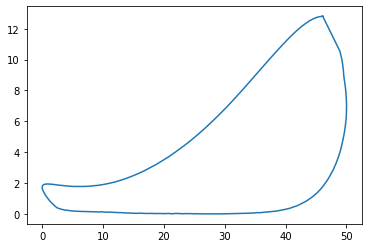

In [5]:
import xlrd
import matplotlib.pyplot as plt

loc = ("Gait_DATA.xls")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)

rows = sheet.nrows
x=[]
y=[]
for i in range(rows):
    if i!=0:
        x.append(sheet.cell_value(i,0))
        y.append(sheet.cell_value(i,1))

plt.plot(x,y)
plt.show()